In [1]:
import mne
import numpy as np
import matplotlib

In [3]:
subject = 'P01'
raw = mne.io.read_raw_fif('data/%s-raw.fif' % subject)

Opening raw data file data/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.


In [5]:
print(raw.info)

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 Stimulus
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>


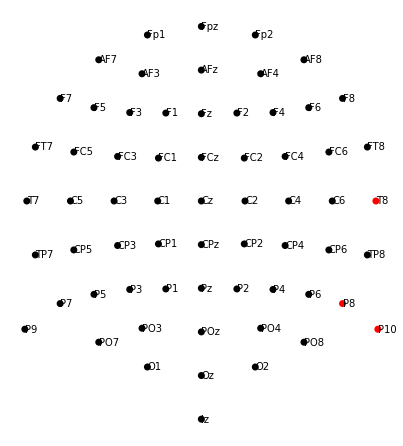

In [24]:
raw.plot_sensors(kind='topomap', show_names=True, to_sphere=True);

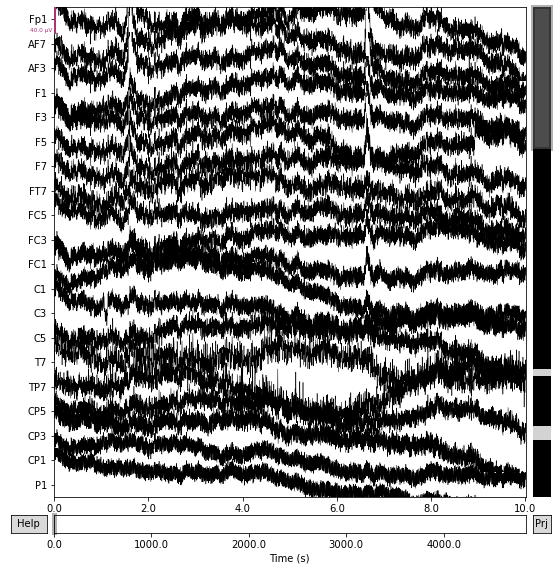

In [23]:
raw.plot();

Effective window size : 0.500 (s)


C:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


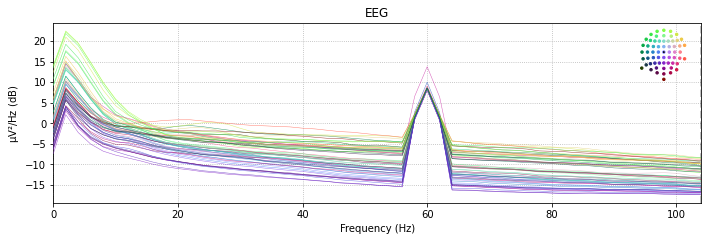

In [29]:
raw.compute_psd(fmax=104).plot();

Fitting ICA to data using 61 channels (please be patient, this may take a while)


<ipython-input-30-be0d71477121>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_obj.fit(raw)


Selecting by number: 20 components
Fitting ICA took 86.5s.


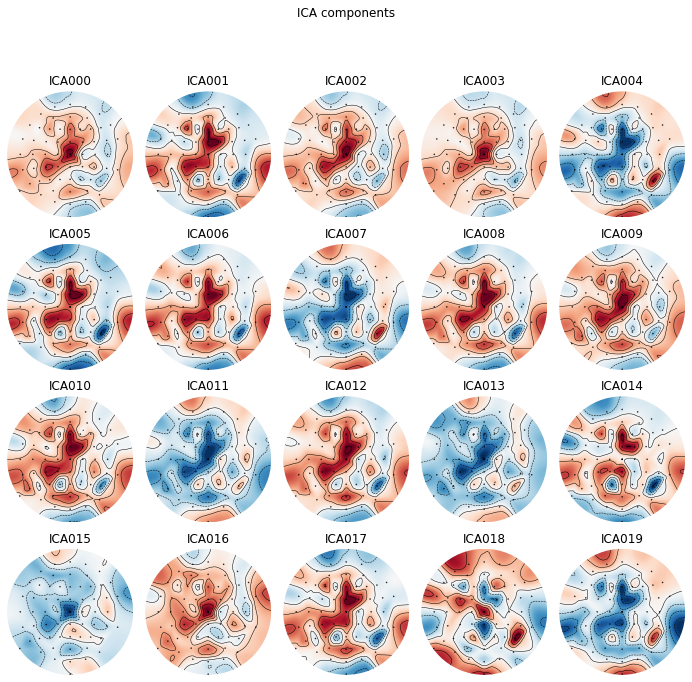

[<MNEFigure size 702x696.24 with 20 Axes>]

In [30]:
ica_obj = mne.preprocessing.ICA(n_components=20, random_state=0)
ica_obj.fit(raw)
ica_obj.plot_components();

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
2420 matching events found
No baseline correction applied
0 projection items activated


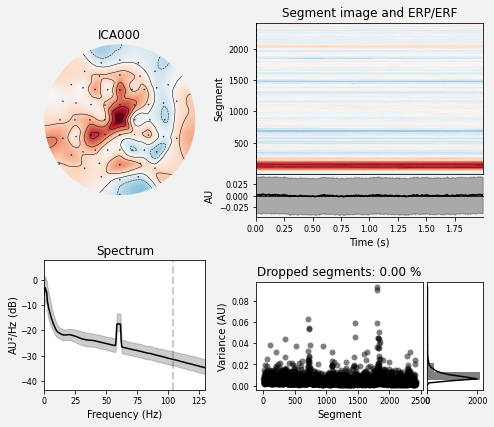

In [32]:
ica_obj.plot_properties(raw, picks=[0]);

In [34]:
mne.events_from_annotations

(69, 2478166)